In [7]:
import numpy as np
from segwey import segwey
import matplotlib.pyplot as plt

In [14]:
# Время падения
env = segwey()
I=[]
for i in range(500):
    i = 0
    s = env.reset()
    while True:
        s,r,d,_ = env.step(0)
        if d:
            break
        i+=1
    I.append(i)
print(np.mean(I))

19.478


Непрерывный вариант

max a 21.446170317136293


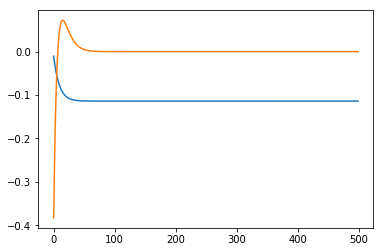

In [3]:
env = segwey()

s = env.reset()
S = []
A = []
d = False
i = 0
while i<500:
    a = env.tet.dot(s)
    s, r, d, _ = env.step(a)
    S.append(s)
    A.append(a)
    i+=1
    if d:
        break
S=np.array(S)
A=np.array(A)
plt.plot(range(len(S)), S[:,[0,1]])
print("max a", np.max(abs(A)))

Дискретный вариант

In [4]:
A = []
for i in range(300):
    d = False
    s = env.reset()
    i = 0
    while i<200:
        a = env.tet.dot(s)
        s, r, d, _ = env.step(a)
        A.append(a)
        i+=1
        if d:
            break
A = np.array(sorted(A))
print(max(abs(A[:-50])))
print(max(abs(A)))

60.19902318573553
70.72849690006007


8 10


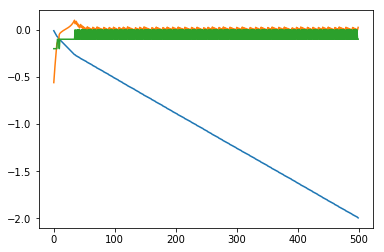

In [5]:
env = segwey()
# env.discrete = True
# env.discrete_level = 25
# env.max_u = 200
env.set_param(discrete_level = 10, max_u = 100)
# env.theta_threshold_radians=100
s = env.reset()
S = []
A = []
d = False
i = 0
while i<500:
    a = env.tet.dot(s)
    tet_a = a
    a = max(-env.max_u, min(a, env.max_u))
    a = int((a/env.max_u)*env.discrete_level) + env.discrete_level
#     print(tet_a, (a-env.discrete_level)/env.discrete_level*env.max_u)
    s, r, d, _ = env.step(a)
    S.append(s)
    A.append(a)
    i+=1
    if d:
        break
S=np.array(S)
A=np.array(A)
plt.plot(range(len(S)), S[:,[0,1]], (A-env.discrete_level)/env.discrete_level)
print(np.min(A), np.max(A))

In [6]:
d = False
fail = 0
N = 300
for i in range(N):
    s = env.reset()
    while i<500:
        a = env.tet.dot(s)
        tet_a = a
        a = max(-env.max_u, min(a, env.max_u))
        a = int((a/env.max_u)*env.discrete_level) + env.discrete_level
    #     print(tet_a, (a-env.discrete_level)/env.discrete_level*env.max_u)
        s, r, d, _ = env.step(a)
        i+=1
        if d:
            fail+=1
            break
print("{:}/{:}".format(fail,N))

0/300
